# 🟥 Ejercicios Tarea

## 1. La implementación de scikit-learn de Naive Bayes tiene un parámetro para controlar el suavizado. Haz una busqueda de parámetros para obtener el *mejor* clasificador Naive Bayes que te sea posible.

In [33]:
# Importar
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import re
from sklearn.metrics import accuracy_score, f1_score


In [3]:
# Cargar datos
train_data = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), categories=['sci.space', 'rec.sport.baseball'])
test_data = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), categories=['sci.space', 'rec.sport.baseball'])

# Conjunto de entrenamiento
X_train_raw = train_data.data
y_train = train_data.target

# Conjunto de prueba
X_test_raw = test_data.data
y_test = test_data.target

In [ ]:
# Preprocesar texto de entrenamiento
X_train_raw = [x.lower() for x in X_train_raw]                  # Todo a minúsculas
X_train_raw = [re.sub(r'\d', ' ', x) for x in X_train_raw]      # Quitar números
X_train_raw = [re.sub(f'[^a-z ]', '', x) for x in X_train_raw]  # Quitar caracteres no alfabéticos

# Preprocesar texto de prueba
X_test_raw = [x.lower() for x in X_test_raw]
X_test_raw = [re.sub(r'\d', ' ', x) for x in X_test_raw]
X_test_raw = [re.sub(f'__', ' ', x) for x in X_test_raw]  # Quitar guiones bajos dobles

# Vectorizar texto (BOW) 
cv = CountVectorizer(max_features=2000, stop_words='english')
X_train_bow = cv.fit_transform(X_train_raw)
X_test_bow = cv.transform(X_test_raw)

In [13]:
# Definir Naive Bayes
nb = MultinomialNB()

# Definir los valores de alpha (suavizado)
param_grid = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}

# Inicializar modelo de búsqueda en términos de accuracy
grid_search_acc = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy')

# Inicializar modelo de búsqueda en términos de f1-score
grid_search_f1 = GridSearchCV(nb, param_grid, cv=5, scoring='f1')

# Ajustar modelos y realizar búsqueda
grid_search_acc.fit(X_train_bow, y_train)
grid_search_f1.fit(X_train_bow, y_train)

# Mostrar todos los accuracy de los modelos evaluados
print("Resultados de la búsqueda de parámetros (accuracy):")
for i, params in enumerate(grid_search_acc.cv_results_['params']):
    print(f"Modelo {i+1}: Parámetros: {params} - Accuracy promedio: {grid_search_acc.cv_results_['mean_test_score'][i]:.4f}")

# Mostrar los mejores parámetros y su accuracy respectivo
print("\nMejores parámetros:", grid_search_acc.best_params_)
print("Mejor accuracy:", grid_search_acc.best_score_)

# Mostrar todos los accuracy de los modelos evaluados
print("\nResultados de la búsqueda de parámetros (f1-score):")
for i, params in enumerate(grid_search_f1.cv_results_['params']):
    print(f"Modelo {i+1}: Parámetros: {params} - f1-score promedio: {grid_search_f1.cv_results_['mean_test_score'][i]:.4f}")

# Mostrar los mejores parámetros y su accuracy respectivo
print("\nMejores parámetros:", grid_search_f1.best_params_)
print("Mejor f1-score:", grid_search_f1.best_score_)


Resultados de la búsqueda de parámetros (accuracy):
Modelo 1: Parámetros: {'alpha': 0.1} - Accuracy promedio: 0.9328
Modelo 2: Parámetros: {'alpha': 0.5} - Accuracy promedio: 0.9269
Modelo 3: Parámetros: {'alpha': 1.0} - Accuracy promedio: 0.9235
Modelo 4: Parámetros: {'alpha': 5.0} - Accuracy promedio: 0.9101
Modelo 5: Parámetros: {'alpha': 10.0} - Accuracy promedio: 0.9025

Mejores parámetros: {'alpha': 0.1}
Mejor accuracy: 0.9327731092436975

Resultados de la búsqueda de parámetros (f1-score):
Modelo 1: Parámetros: {'alpha': 0.1} - f1-score promedio: 0.9302
Modelo 2: Parámetros: {'alpha': 0.5} - f1-score promedio: 0.9231
Modelo 3: Parámetros: {'alpha': 1.0} - f1-score promedio: 0.9190
Modelo 4: Parámetros: {'alpha': 5.0} - f1-score promedio: 0.9028
Modelo 5: Parámetros: {'alpha': 10.0} - f1-score promedio: 0.8937

Mejores parámetros: {'alpha': 0.1}
Mejor f1-score: 0.9301853597624892


En ambos casos notamos que el mejor rendimiento ocurre con *alpha*=0.1 y que de 0.5 en adelante el desempeño disminuye gradualmente. Por lo tanto, procedemos a realizar un nuevo *GridSearch* en el rango de valores entre 0.1 y 0.5.  

In [12]:
# Definir los valores de alpha (suavizado)
param_grid = {'alpha': [0.05, 0.1, 0.15, 0.2, 2.5, 0.3, 0.35, 0.4, 0.45]}

# Inicializar modelo de búsqueda en términos de accuracy
grid_search_acc = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy')

# Inicializar modelo de búsqueda en términos de f1-score
grid_search_f1 = GridSearchCV(nb, param_grid, cv=5, scoring='f1')

# Ajustar modelos y realizar búsqueda
grid_search_acc.fit(X_train_bow, y_train)
grid_search_f1.fit(X_train_bow, y_train)

# Mostrar todos los accuracy de los modelos evaluados
print("Resultados de la búsqueda de parámetros (accuracy):")
for i, params in enumerate(grid_search_acc.cv_results_['params']):
    print(f"Modelo {i+1}: Parámetros: {params} - Accuracy promedio: {grid_search_acc.cv_results_['mean_test_score'][i]:.4f}")

# Mostrar los mejores parámetros y su accuracy respectivo
print("\nMejores parámetros:", grid_search_acc.best_params_)
print("Mejor accuracy:", grid_search_acc.best_score_)

# Mostrar todos los accuracy de los modelos evaluados
print("\nResultados de la búsqueda de parámetros (f1-score):")
for i, params in enumerate(grid_search_f1.cv_results_['params']):
    print(f"Modelo {i+1}: Parámetros: {params} - f1-score promedio: {grid_search_f1.cv_results_['mean_test_score'][i]:.4f}")

# Mostrar los mejores parámetros y su accuracy respectivo
print("\nMejores parámetros:", grid_search_f1.best_params_)
print("Mejor f1-score:", grid_search_f1.best_score_)


Resultados de la búsqueda de parámetros (accuracy):
Modelo 1: Parámetros: {'alpha': 0.05} - Accuracy promedio: 0.9311
Modelo 2: Parámetros: {'alpha': 0.1} - Accuracy promedio: 0.9328
Modelo 3: Parámetros: {'alpha': 0.15} - Accuracy promedio: 0.9328
Modelo 4: Parámetros: {'alpha': 0.2} - Accuracy promedio: 0.9328
Modelo 5: Parámetros: {'alpha': 2.5} - Accuracy promedio: 0.9176
Modelo 6: Parámetros: {'alpha': 0.3} - Accuracy promedio: 0.9286
Modelo 7: Parámetros: {'alpha': 0.35} - Accuracy promedio: 0.9294
Modelo 8: Parámetros: {'alpha': 0.4} - Accuracy promedio: 0.9277
Modelo 9: Parámetros: {'alpha': 0.45} - Accuracy promedio: 0.9277

Mejores parámetros: {'alpha': 0.1}
Mejor accuracy: 0.9327731092436975

Resultados de la búsqueda de parámetros (f1-score):
Modelo 1: Parámetros: {'alpha': 0.05} - f1-score promedio: 0.9286
Modelo 2: Parámetros: {'alpha': 0.1} - f1-score promedio: 0.9302
Modelo 3: Parámetros: {'alpha': 0.15} - f1-score promedio: 0.9299
Modelo 4: Parámetros: {'alpha': 0.2} -

Notamos que en ambos casos, el mejor valor de alpha sigue siendo 0.1

In [35]:
# Evaluar el modelo con los datos de prueba
nb = MultinomialNB(alpha=0.1)  # Usar el mejor alpha encontrado
nb.fit(X_train_bow, y_train)
y_pred_nb = nb.predict(X_test_bow)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb)

print(f'\nNaive Bayes: Accuracy = {nb_accuracy:.4f}')
print(f'Naive Bayes: f1-score = {nb_f1:.4f}')


Naive Bayes: Accuracy = 0.9330
Naive Bayes: f1-score = 0.9311


## 2. Usando cualquier clasificador clásico de Machine Learning de tu preferencia, busca supera el rendimiento del clasificador Naive Bayes. Escoge uno, ya sea que mejore o el que más se acerque al rendimiento del Naive Bayes.

In [ ]:
# Importar clasificadores
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [23]:
# Diccionario con clasificadores
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Ajustar y evaluar cada clasificador
results_acc = {}
results_f1 = {}
for name, clf in classifiers.items():
    clf.fit(X_train_bow, y_train)
    y_pred = clf.predict(X_test_bow)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results_acc[name] = accuracy
    results_f1[name] = f1
    print(f'{name}: Accuracy = {accuracy:.4f}')
    print(f'{name}: f1-score = {f1:.4f}\n')

# Extraer clasificador con mejor accuracy
best_classifier_acc = max(results_acc, key=results_acc.get)
best_accuracy = results_acc[best_classifier_acc]

# Extraer clasificador con mejor f1-score
best_classifier_f1 = max(results_f1, key=results_f1.get)
best_f1 = results_f1[best_classifier_f1]

# Mostrar clasificador con mejor accuracy
print(f'\nEn términos de accuracy el mejor clasificador es {best_classifier_acc} con un accuracy de {best_accuracy:.4f}')

# Mostrar clasificador con mejor f1-score
print(f'En términos de f1-score el mejor clasificador es {best_classifier_f1} con un f1-score de {best_f1:.4f}')


Logistic Regression: Accuracy = 0.8976
Logistic Regression: f1-score = 0.8944

Support Vector Machine: Accuracy = 0.8609
Support Vector Machine: f1-score = 0.8468

Random Forest: Accuracy = 0.8938
Random Forest: f1-score = 0.8883

K-Nearest Neighbors: Accuracy = 0.6372
K-Nearest Neighbors: f1-score = 0.5591

Decision Tree: Accuracy = 0.8319
Decision Tree: f1-score = 0.8195


En términos de accuracy el mejor clasificador es Logistic Regression con un accuracy de 0.8976
En términos de f1-score el mejor clasificador es Logistic Regression con un f1-score de 0.8944


Respecto a ambas métricas, el modelo Logistic Regression tiene el rendimiento que más se acerca a Naive Bayes. 

Procedemos a ajustar algunos de sus hiperparámetros para intentar acercarnos aún más al rendimiento de Naive Bayes.

In [26]:
# Definir hiperparámetros para el GridSearch
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Valores para la regularización
    'penalty': ['l1', 'l2'],        # Tipo de penalización
    'solver': ['liblinear', 'saga'], # Solvers compatibles con l1 y l2
    'max_iter': [100, 200, 500]      # Número de iteraciones
}

# Inicializar el modelo Logistic Regression
logreg = LogisticRegression()

# Configurar GridSearchCV con validación cruzada
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train_bow, y_train)

# Mostrar los mejores parámetros
print("\nMejores parámetros:", grid_search.best_params_)

# Evaluar en el conjunto de prueba con el mejor modelo
best_logreg = grid_search.best_estimator_
y_pred_logreg = best_logreg.predict(X_test_bow)

# Calcular accuracy y f1-score en el conjunto de prueba
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_f1 = f1_score(y_test, y_pred_logreg)

print(f'\nAccuracy del mejor modelo de Logistic Regression en el conjunto de prueba: {logreg_accuracy:.4f}')
print(f'F1-score del mejor modelo de Logistic Regression en el conjunto de prueba: {logreg_f1:.4f}')


c:\Users\jcbar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jcbar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jcbar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jcbar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jcbar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 


Mejores parámetros: {'C': 0.01, 'max_iter': 200, 'penalty': 'l2', 'solver': 'saga'}

Accuracy del mejor modelo de Logistic Regression en el conjunto de prueba: 0.9115
F1-score del mejor modelo de Logistic Regression en el conjunto de prueba: 0.9100


Notamos que el mejor rendimiento se obtiene con *C*=0.01 por lo que procedemos a repetir al GridSearch ahora con un distinto rango de valores para C. 

In [27]:
# Definir hiperparámetros para el GridSearch
param_grid = {
    'C': [0.01, 0.02, 0.03, 0.04, 0.05],  # Valores para la regularización
    'penalty': ['l1', 'l2'],        # Tipo de penalización
    'solver': ['liblinear', 'saga'], # Solvers compatibles con l1 y l2
    'max_iter': [100, 200, 500]      # Número de iteraciones
}

# Inicializar el modelo Logistic Regression
logreg = LogisticRegression()

# Configurar GridSearchCV con validación cruzada
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train_bow, y_train)

# Mostrar los mejores parámetros
print("\nMejores parámetros:", grid_search.best_params_)

# Evaluar en el conjunto de prueba con el mejor modelo
best_logreg = grid_search.best_estimator_
y_pred_logreg = best_logreg.predict(X_test_bow)

# Calcular accuracy y f1-score en el conjunto de prueba
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_f1 = f1_score(y_test, y_pred_logreg)

print(f'\nAccuracy del mejor modelo de Logistic Regression en el conjunto de prueba: {logreg_accuracy:.4f}')
print(f'F1-score del mejor modelo de Logistic Regression en el conjunto de prueba: {logreg_f1:.4f}')


c:\Users\jcbar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jcbar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jcbar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jcbar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jcbar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 


Mejores parámetros: {'C': 0.04, 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga'}

Accuracy del mejor modelo de Logistic Regression en el conjunto de prueba: 0.9153
F1-score del mejor modelo de Logistic Regression en el conjunto de prueba: 0.9146


c:\Users\jcbar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## 3. Repite el ejercicio 2 usando un clasificador basado en una red neuronal. Reporta el mejor rendimiento.

### En los tres casos, usa el F1 score. Compara los 3 resultados en un gráfico similar al que hicimos en esta notebook.

In [ ]:
# Importar modelo de red neuronal multicapa 
from sklearn.neural_network import MLPClassifier

In [38]:
# Definir el modelo de red neuronal
mlp = MLPClassifier()

# Definir los parámetros para la búsqueda de hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(50,50), (100,100)],  # Tamaños de las capas ocultas
    'activation': ['relu', 'tanh'],              # Función de activación
    'solver': ['adam', 'sgd'],                   # Optimizadores
    'learning_rate': ['constant', 'adaptive'],   # Tipo de tasa de aprendizaje
    'max_iter': [300, 500]                       # Número máximo de iteraciones
}

# Inicializar GridSearchCV
grid_search_nn = GridSearchCV(mlp, param_grid, cv=5, scoring='f1')

# Ajustar la red neuronal a los datos de entrenamiento
grid_search_nn.fit(X_train_bow, y_train)

# Evaluar el mejor modelo encontrado en el conjunto de prueba
best_nn = grid_search_nn.best_estimator_
y_pred_nn = best_nn.predict(X_test_bow)

# Calcular F1-score y Accuracy
nn_accuracy = accuracy_score(y_test, y_pred_nn)
nn_f1 = f1_score(y_test, y_pred_nn)

c:\Users\jcbar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jcbar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jcbar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jcbar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the opti

In [39]:
# Mostrar los mejores parámetros
print("\nMejores parámetros:", grid_search_nn.best_params_)

# Mostrar el mejor accuracy
print(f'\nMejor accuracy de Red Neuronal: {nn_accuracy:.4f}')
print(f'Mejor f1-score de Red Neuronal: {nn_f1:.4f}')



Mejores parámetros: {'activation': 'relu', 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'max_iter': 500, 'solver': 'sgd'}

Mejor accuracy de Red Neuronal: 0.9115
Mejor f1-score de Red Neuronal: 0.9093


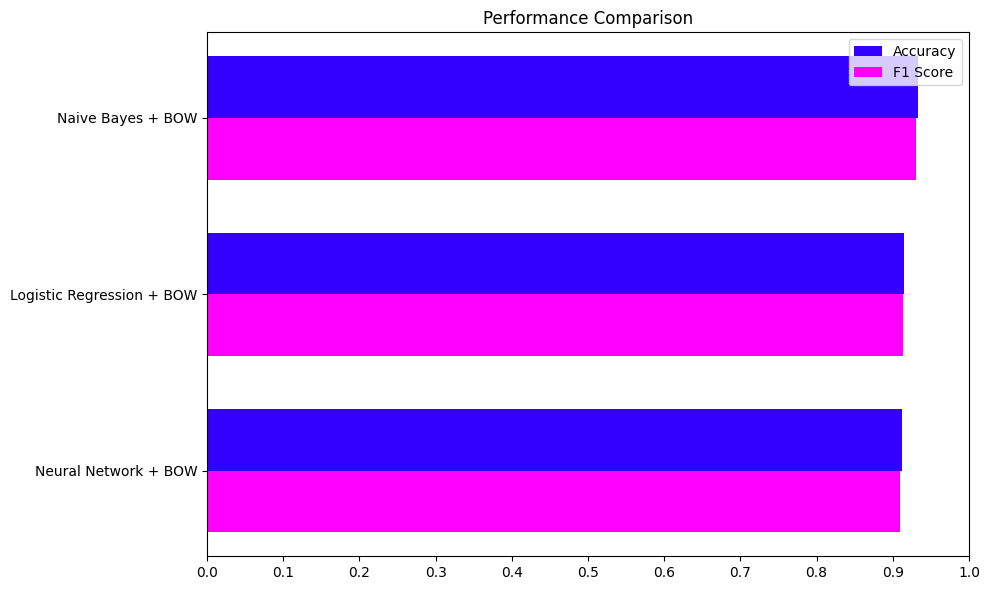

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Nombres y resultados para cada modelo
names = ['Naive Bayes + BOW', 'Logistic Regression + BOW', 'Neural Network + BOW']
accs = [nb_accuracy, logreg_accuracy, nn_accuracy]
f1s = [nb_f1, logreg_f1, nn_f1]

# Generar gráfico de barras
y = np.arange(len(names))
height = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(y - height/2, accs, height, label='Accuracy', color='#3300FF')
ax.barh(y + height/2, f1s, height, label='F1 Score', color='#FF00FF')

ax.set_yticks(y)
ax.set_yticklabels(names)
ax.invert_yaxis()  # Para que las etiquetas se lean de arriba hacia abajo
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.set_title('Performance Comparison')
ax.legend(loc='best')

plt.tight_layout()
plt.show()


## 4. Repite los experimentos 1-3 con un nuevo corpus. Este corpus son 50K reviews de IMDB, es una tarea de análisis de sentimientos. El corpus lo puedes bajar usando la instrucción:

        !gdown 18kGdlhOiQNS61wUK7uPbdquKL3XJrgzf

In [41]:
!pip install gdown


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
!gdown 18kGdlhOiQNS61wUK7uPbdquKL3XJrgzf

Downloading...
From: https://drive.google.com/uc?id=18kGdlhOiQNS61wUK7uPbdquKL3XJrgzf
To: c:\Users\jcbar\Documents\3er_semestre\PLN\Tarea_4\IMDB.csv

  0%|          | 0.00/66.2M [00:00<?, ?B/s]
  1%|          | 524k/66.2M [00:00<00:18, 3.58MB/s]
  2%|▏         | 1.05M/66.2M [00:00<00:15, 4.22MB/s]
  2%|▏         | 1.57M/66.2M [00:00<00:15, 4.11MB/s]
  3%|▎         | 2.10M/66.2M [00:00<00:15, 4.16MB/s]
  4%|▍         | 2.62M/66.2M [00:00<00:15, 4.06MB/s]
  5%|▍         | 3.15M/66.2M [00:00<00:22, 2.77MB/s]
  6%|▋         | 4.19M/66.2M [00:01<00:15, 3.93MB/s]
  7%|▋         | 4.72M/66.2M [00:01<00:16, 3.74MB/s]
  9%|▊         | 5.77M/66.2M [00:01<00:24, 2.49MB/s]
 10%|▉         | 6.29M/66.2M [00:02<00:29, 2.04MB/s]
 10%|█         | 6.82M/66.2M [00:02<00:28, 2.06MB/s]
 11%|█         | 7.34M/66.2M [00:02<00:29, 2.03MB/s]
 12%|█▏        | 7.86M/66.2M [00:03<00:30, 1.93MB/s]
 13%|█▎        | 8.39M/66.2M [00:03<00:27, 2.08MB/s]
 13%|█▎        | 8.91M/66.2M [00:03<00:25, 2.21MB/s]
 14%|█▍     

In [44]:
# Importar librerías
import pandas as pd
from sklearn.model_selection import train_test_split

In [45]:
# Cargar los datos
df = pd.read_csv('IMDB.csv') 

# Dividir el corpus en reviews y labels (positivo/negativo)
X = df['review']  
y = df['sentiment']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [46]:
# Preprocesamiento de los datos
X_train = [x.lower() for x in X_train]
X_train = [re.sub(r'\d', ' ', x) for x in X_train]
X_train = [re.sub(f'[^a-z ]', '', x) for x in X_train]

X_test = [x.lower() for x in X_test]
X_test = [re.sub(r'\d', ' ', x) for x in X_test]
X_test = [re.sub(f'[^a-z ]', '', x) for x in X_test]

In [47]:
# Vectorizar el texto (BOW)
cv = CountVectorizer(max_features=2000, stop_words='english')
X_train_bow = cv.fit_transform(X_train)
X_test_bow = cv.transform(X_test)


**Naive Bayes**

In [48]:
# Mejor Naive Bayes
nb = MultinomialNB(alpha=0.1)
nb.fit(X_train_bow, y_train)

# Predicción y evaluación
y_pred_nb = nb.predict(X_test_bow)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb, pos_label='positive')

print(f'Naive Bayes: Accuracy = {nb_accuracy:.4f}, F1-score = {nb_f1:.4f}')

Naive Bayes: Accuracy = 0.8372, F1-score = 0.8394


**Logistic Regression**

In [49]:
# Mejor Logistic Regression
logreg = LogisticRegression(C=0.04, max_iter=500, penalty='l2', solver='saga')
logreg.fit(X_train_bow, y_train)

# Predicción y evaluación
y_pred_logreg = logreg.predict(X_test_bow)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_f1 = f1_score(y_test, y_pred_logreg, pos_label='positive')

print(f'Logistic Regression: Accuracy = {logreg_accuracy:.4f}, F1-score = {logreg_f1:.4f}')

Logistic Regression: Accuracy = 0.8747, F1-score = 0.8775


**Neural Network**

In [50]:
# Mejor Red Neuronal
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', solver='sgd', max_iter=500, learning_rate='adaptive')
mlp.fit(X_train_bow, y_train)

# Predicción y evaluación
y_pred_nn = mlp.predict(X_test_bow)
nn_accuracy = accuracy_score(y_test, y_pred_nn)
nn_f1 = f1_score(y_test, y_pred_nn, pos_label='positive')

print(f'Neural Network: Accuracy = {nn_accuracy:.4f}, F1-score = {nn_f1:.4f}')

Neural Network: Accuracy = 0.8525, F1-score = 0.8546


## 5. Con la experiencia ganada con esta notebook y estos experimentos. Responde lo siguiente ¿qué opinas sobre el papel del algoritmo Naive Bayes en la clasificación de texto? ¿qué ventajas y desventajas observas?

Unas de las principales ventajas de Naive Bayes es que es muy eficiente y rápido para la clasificación de texto, sobre todo cuando se utiliza con representaciones como Bag of Words. Sus  capacidades lo vuelven muy bueno para tareas donde las clases están bien diferenciadas, como la clasificación de temáticas. En estos casos, como en el conjunto de datos de 20newsgroups, Naive Bayes demostró superar a modelos más complejos, aprovechando las diferencias claras entre las características de cada clase. Además, su capacidad para trabajar bien con datos *sparse* le otorga una ventaja significativa en tareas de PLN.

Sin embargo, su principal limitación es la suposición de independencia entre las características, lo que restringe su capacidad para capturar relaciones complejas entre palabras, algo esencial en tareas como el análisis de sentimientos. En el caso de las reseñas de IMDB, Naive Bayes fue superado por modelos como Regresión Logística y Redes Neuronales, que pueden capturar mejor el contexto y las interacciones entre palabras. Esta limitación lo hace menos adaptable a problemas donde las relaciones entre las características son más complejas, y en estos escenarios, otros modelos suelen ofrecer un mejor rendimiento.